<h1>Computer Vision with Tensorflow</h1>
> by: Akmarina Khairunnisa


Convolutional Neural Networks (CNNs) leverage spatial information, and they are therefore well suited for classifying images. We will learn how to write a CNN program in the most powerful, popular, and scalable machine learning stack available; **TensorFlow** and **Keras**. The program must be able to recognize the shape of the hands that make up scissors, rock, or paper.

There are many complex tasks that can be done with computer vision and can be solved by composing CNNs into larger and more complex architectures.
 - Classification
 - Semantic Segmentation
 - Classification and Localizing
 - Object Detection
 - Instance Segmentation

This project requires us to carry out classification tasks. In the classification task we will have to report the class of object found in the image, but also the coordinates of the bounding box where the object appears in the image. This type of task assumes that there is only one instance of the object in an image.


<h2>Module for Image Processing</h2>
<h4>Tensorflow 2.0</h4>

make sure to use tensorflow 2.0 or later because the 2.0 release has the
improved usability, clarity, and flexibility of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


upgrade TensorFlow **only if** you got the older version of it, with this code below

In [ ]:
!pip install tensorflow --upgrade

<h2>Get the Data</h2>

<h3>Download File from the URL</h3>

Avoiding SSL Certificate Error with "--no-check-certificate"
the output file of the link operation will be saved on temporary folder

In [2]:
# Avoid SSL Certificate Error with "--no-check-certificate"
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
# The output file of the link operation saved on temporary folder (\tmp)

--2020-07-30 05:20:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.93MB/s    in 45s     

2020-07-30 05:21:25 (6.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



<h3>Extract the Zip File</h3>

The data is extracted from the ZIP file, and stored in each directory in the temporary folder (tmp)

In [3]:
from zipfile import ZipFile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = ZipFile(local_zip,'r') # create a ZipFile object in READ mode and name it as zip_ref
zip_ref.extractall('/tmp') # Extract all the contents of the zip file in temporary folder
zip_ref.close() # Close the archive file so the essential records will be written

The `os` module in python provides many functions to interact with the file system. It is used in this project to manage the file which is saved in `tmp` and create some directories for better data management.
Some functions will be used in here are,
- `os.mkdir` which is used in Python to create a directory named path with the specified numeric mode
- `os.path.join` is used to join one or more path components intelligently. This function concatenates various path components with exactly one directory
- `os.listdir` returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order.

In [4]:
import os
base_dir = '/tmp/rockpaperscissors'
train_dir = '/tmp/rockpaperscissors/train'
os.mkdir(train_dir,mode=0o777)
validation_dir = '/tmp/rockpaperscissors/validation'
os.mkdir(validation_dir,mode=0o777)

In [5]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

print the number of images in each class

In [6]:
print("Rock : ",len(os.listdir(rock_dir)))
print("Paper : ",len(os.listdir(paper_dir)))
print("Scissors : ",len(os.listdir(scissors_dir)))

Rock :  726
Paper :  712
Scissors :  750


create the classes folder in each; training data folder and data validation folder

In [7]:
# Training Data Directory for Rock
train_rock_dir = os.path.join(train_dir,'rock')
os.mkdir(train_rock_dir,mode=0o777)
# Training Data Directory for Paper
train_paper_dir = os.path.join(train_dir,'paper')
os.mkdir(train_paper_dir,mode=0o777)
# Training Data Directory for Scissors
train_scissors_dir = os.path.join(train_dir,'scissors')
os.mkdir(train_scissors_dir,mode=0o777)
# Validation Data Directory for Rock
validation_rock_dir = os.path.join(validation_dir,'rock')
os.mkdir(validation_rock_dir,mode=0o777)
# Validation Data Directory for Paper
validation_paper_dir = os.path.join(validation_dir,'paper')
os.mkdir(validation_paper_dir,mode=0o777)
# Validation Data Directory for Scissors
validation_scissors_dir = os.path.join(validation_dir,'scissors')
os.mkdir(validation_scissors_dir,mode=0o777)

Dividing the data into training dataset and validation dataset. One of the requirements that must be metin this project is: validation data must be 40 percent of the total dataset

In [8]:
from random import sample
from shutil import copyfile

def split_data(source, training, validation, val_size):
    list_all=os.listdir(source)
    size=len(os.listdir(source))
    list_val=sample(list_all, (int(float(size)*val_size)))
    list_train=list(set(list_all) - set(list_val))
    
    for file in list_train:
        name = os.path.join(source,file)
        new_name = os.path.join(training, file)
        if os.path.isfile(name) and os.path.getsize(name)>0 :
            copyfile(name,new_name)
            os.chmod(new_name, 0o777)
        else :
            print('file does not exist', name)
            
    for file in list_val:
        name = os.path.join(source,file)
        new_name = os.path.join(validation,file)
        if os.path.isfile(name) and os.path.getsize(name)>0  :
            copyfile(name,new_name)
            os.chmod(new_name,0o777)
        else :
            print('file does not exist', name)

In [9]:
split_data(paper_dir, train_paper_dir, validation_paper_dir, 0.4)
split_data(rock_dir, train_rock_dir, validation_rock_dir, 0.4)
split_data(scissors_dir, train_scissors_dir, validation_scissors_dir, 0.4)

print the number of images on each class in training and validation dataset

In [10]:
print("Paper Training: ",len(os.listdir(train_paper_dir)))
print("Paper Validation: ",len(os.listdir(validation_paper_dir)))
print("Rock Training: ",len(os.listdir(train_rock_dir)))
print("Rock Validation: ",len(os.listdir(validation_rock_dir)))
print("Scissors Training: ",len(os.listdir(train_scissors_dir)))
print("Scissors Validation: ",len(os.listdir(validation_scissors_dir)))

Paper Training:  428
Paper Validation:  284
Rock Training:  436
Rock Validation:  290
Scissors Training:  450
Scissors Validation:  300


<h2>Image Preprocessing (Data Augmentation) </h2>

Data Augmentation is a method of **artificially creating a new dataset for training from the existing training dataset** to improve the performance of deep learning neural networks with the amount of data available. It is a form of regularization which makes our model generalize better than before. It must be noted that Data Augmentation **doesn't add more training data**, instead it replaces the original training batch with the new randomly transformed batch.

Here we have used a Keras `ImageDataGenerator` object to apply data augmentation to the images for randomly translating, resizing, rotating, etc. Each new batch of our data is randomly adjusting according to the parameters supplied to `ImageDataGenerator`.


The datasets we download contains folders of data corresponding to the respective classes. This led to the need for a method that takes the path to a directory and generates batches of augmented data. In Keras this is done using the `flow_from_directory(directory)` method for the augmentation because the labels are inferred from directory structure.

**Arguments**
- `featurewise_center` is a boolean value which calculates the mean pixel value across the entire training dataset, then subtract it from each image. This is called centering and has effect of centering the distribution of pixel values on zero.

- `rescale` is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0 - 255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1./255 factor.

- `width_shift_range` and `height_shift_range` are ranges within which to randomly translate pictures vertically or horizontally. The range could be as a float, 1-D array-like or int. The code here using the 1-D array-like type which includes random elements from the array
("-shift_range", "shift_range") 

- `brightness_range` is a tuple or list of two floats which range for picking a brightness shift value from

- `shear_range` is for randomly applying shearing transformations. 
It stretch the image at a certain angle known as the shear angle (Shear angle in counter-clockwise direction in degrees). This creates a sort of ‘stretch’ in the image, which is not seen in rotation. shear_range specifies the angle of the slant in degrees

- `zoom_range` is a value for randomly zooming inside pictures

- `rotation_range` is a value in degrees (0 - 180) range which randomly rotate pictures

- `horizontal_flip` is a boolean which randomly flip inputs horizontally.

- `vertical_flip` is a boolean Randomly flip inputs vertically.

- `fill_mode` is One of {"constant", "nearest", "reflect" or "wrap"}. 
It is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Points outside the boundaries of the input are filled according to the given mode: 
    - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) 
    - 'nearest': aaaaaaaa|abcd|dddddddd 
    - 'reflect': abcddcba|abcd|dcbaabcd 
    - 'wrap': abcdabcd|abcd|abcdabcd


In [11]:
# define data augmentation configuration
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes=3
img_rows,img_cols=120,120
batch_size=32

train_datagen = ImageDataGenerator(
        rescale=1/255.0,
        zoom_range=0.25,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
validation_datagen = ImageDataGenerator(
        rescale=1/255.0)
# setup generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_rows,img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=False)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


<h2>Build CNN Architecture</h2>
<h4>Import the Module</h4>

There are several steps in building the CNN model in this project:
- **Convolutional**
>import `Conv2D` to carry out convolutional operations in training images
- **Pooling**
>`MaxPooling2D` usually used for its pooling operation to reduce spatial dimensions in between residual modules
- **Flatten**
>import `Flatten` for its flattening function
- **Full Connection**
>import `Dense` to run our full neural network connection





In [12]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

<h3>Create a Sequential Model</h3>

A `Sequential` model is appropriate for a plain stack of layers where each layer has **exactly one input tensor and one output tensor**. `Sequential` groups a linear stack of layers into a tf.keras.Model.
`Sequential` provides training and inference features on this model.


<h3>Convolutional using Conv2D</h3>

We are going to use the Keras `Conv2D` class to implement a simple CNN.

**Arguments**
- `filters` explains the number of filters that the Convolutional layer will learn.
Layers closer to the actual input image learn fewer convolutional filters, while layers closer to the output predictions will learn more filters.
The exact range of the values may be different for each person, but start with a smaller number of filters and only increase when necessary.

- `kernel_size` is a 2-tuple specifying the width and height of the convolution window. **The `kernel_size` must be an odd integer**. Typical values for `kernel_size` include: `(1,1)` , `(3,3)` , `(5,5)` , `(7,7)`. It's rare to see kernel sizes larger than 7x7.
If our input images are greater than 128x128 we may choose to use a `kernel_size` > 3 to learn larger features and then quickly reduce spatial dimensions - then start working with 3x3 kernels to help

- `strides` is a parameter in 2-tuple of integers, specifying the "step" of the convolutional along the x and y axis of the input volume. It reduces spatial dimensions of the volume

- The `padding` parameter to the Keras Conv2D class can take on one of two values of `valid` or `same`. With the `same` for the `padding`, the output volume size will match the input volume size because the spatial dimensions of the volume are preserved.

- The `activation` parameter to the `Conv2D` class is simply a convenience parameter, allowing us to supply a string specifying the name of the activation function we want to apply after performing the convolution. For dataset that have 3 or more classes, use the Softmax activation function in the output layer - the output of this layer are the prediction values themselves. The softmax activation function will choose which class has the highest probability.

- The `use_bias` parameter of the `Conv2D` class controls whether a bias vector is added to the convolutional layer. Typically you'll want to leave this value as `True`.


`Dropout`'s purpose is to help your network generalize and not overfit. Neurons from the current layer, with probability p, will randomly disconect from neurons in the next layer so that the network has to rely on the existing connections. 

<h3>Pooling</h3>

Pooling aims to reduce the size of the image as much as possible. Here also we try to reduce the total number of nodes in the next layer. Pooling in the form of a 2x2 matrix as minimum pixel loss and precise region where features are allocated.

<h3>Flatten</h3>

Next is the flattening process. The pooling data that we have are in the form of 2-dimensional arrays and then converted to single vector one-dimensional data.

<h3>Dense</h3>

Dense layer on Keras is a layer that can be used as a hidden layer and output layer on an MLP.

In [13]:
# Create a Sequential model by passing a list of layers to the Sequential constructor
from tensorflow.keras.layers import Dropout
model = Sequential([Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', 
                           input_shape=(img_rows,img_cols,3)),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dropout(0.5),
                    Dense(units=512, activation='relu'),
                    Dense(units=num_classes, activation='softmax')])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0

<h2>Callbacks</h2>

Usage of callbacks via the built-in `fit()` loop. We will pass a custom callback to the `.fit()` method of a model. The relevant methods of the callbacks will then be called at each stage of the training.

In [15]:
accuracythreshold=96e-2

class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(accuracythreshold*100))   
          self.model.stop_training = True

<h2>Model Compiler</h2>

Now that we have finished building the CNN model, it's time to compile.
- `optimizer` parameter to determine the stochastic gradient descent algorithm
- `loss` parameter to determine the loss function
- `metrics` parameter to determine the performance metric

In [16]:
# Compile the Model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


<h2> Model Training </h2>

In training the model, we use the `.fit` function.
TensorFlow is in the process of deprecating the `.fit_generator` method which supported data augmentation. If we are using `tensorflow==2.2.0` or `tensorflow-gpu==2.2.0` (or higher), then we must use the `.fit` method (which now supports data augmentation) 

When we call the `.fit()` function in our code, it makes assumptions:
- Keras is first calling the generator function(dataAugmentaion)
- Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.
- The `.fit_()` function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
- For the number of epochs specified the process is repeated.

**Arguments**
- **object** : the keras object model to train. It could be defined as one of two ways
  - **X** and **Y**: training data and training labels. They can be Vector, array or matrix each
  - **generator** : a single output of the generator makes a single batch and hence all arrays in the list must be having the length equal to the size of the batch. 
The generator is expected to loop over its data infinite number of times, it should never return or exit. The output of a generator is a list of the form: 
    - (inputs, targets) 
    - (input, targets, sample_weights) 
- `batch_size` : it can take any integer value or NULL and by default, it will
be set to 32. It specifies the number of samples per gradient. BUT Do not specify the batch_size if your data is in the form of a dataset, generators, or `keras.utils.Sequence` instances (since they generate batches).
- `epochs` :  Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.
- `callbacks`: List of callbacks to apply during training.
- `validation_data` can be either: 
   - an inputs and targets list 
   - a generator 
   - an inputs, targets, and sample_weights list which can be used to evaluate the loss and metrics for any model after any epoch has ended.
- `shuffle` : whether we want to shuffle our training data before each epoch     
- `steps_per_epoch` : it specifies the total number of steps taken before
one epoch has finished and started the next epoch. By default it values is set to NULL. We can calculate the value of `steps_per_epoch` as the total number of samples in your dataset divided by the batch size.
- `validation_steps` :only if the validation_data is a generator then only this argument can be used. It specifies the total number of steps taken from the generator before it is stopped at every epoch and its value is calculated as the total number of validation data points in your dataset divided by the validation batch size.

In [17]:
nb_train_samples=1314
nb_validation_samples=874
epochs=55

history=model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=[AccCallback()],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/55
41/41 [==============================] - 40s 978ms/step - loss: 1.1473 - accuracy: 0.3768 - val_loss: 1.0597 - val_accuracy: 0.5845
Epoch 2/55
41/41 [==============================] - 41s 1000ms/step - loss: 0.8913 - accuracy: 0.5671 - val_loss: 0.4402 - val_accuracy: 0.8611
Epoch 3/55
41/41 [==============================] - 40s 966ms/step - loss: 0.5175 - accuracy: 0.8190 - val_loss: 0.2772 - val_accuracy: 0.9144
Epoch 4/55
41/41 [==============================] - 39s 962ms/step - loss: 0.3232 - accuracy: 0.8853 - val_loss: 0.1993 - val_accuracy: 0.9178
Epoch 5/55
41/41 [==============================] - 43s 1s/step - loss: 0.3010 - accuracy: 0.8924 - val_loss: 0.2381 - val_accuracy: 0.9144
Epoch 6/55
41/41 [==============================] - 39s 959ms/step - loss: 0.2780 - accuracy: 0.8931 - val_loss: 0.1493 - val_accuracy: 0.9502
Epoch 7/55
41/41 [==============================] - 40s 966ms/step - loss: 0.2655 - accuracy: 0.9111 - val_loss: 0.2127 - val_accuracy: 0.9352
E

<h2>Accuracy Plot</h2>

<function matplotlib.pyplot.show>

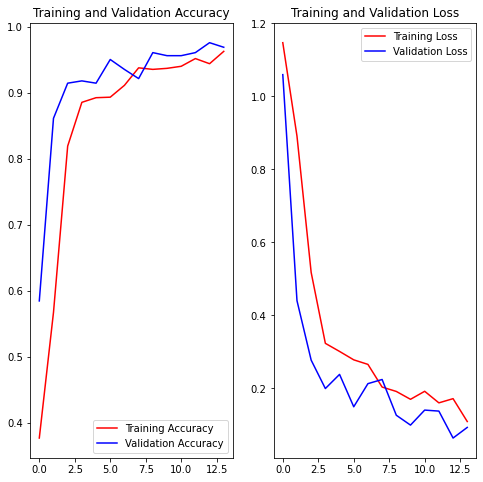

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib.pyplot import figure,subplot,plot,legend,title,show
figure(figsize=(8,8))
subplot(1, 2, 1)
plot(epochs, acc, 'r', label='Training Accuracy')
plot(epochs, val_acc, 'b', label='Validation Accuracy')
legend(loc='lower right')
title('Training and Validation Accuracy')
show

subplot(1, 2, 2)
plot(epochs, loss, 'r', label='Training Loss')
plot(epochs, val_loss, 'b', label='Validation Loss')
legend(loc='upper right')
title('Training and Validation Loss')
show

<h2>Prediction</h2>

Using TensorFlow backend.


Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png
1Io5Ksm3bqy87EAU.png
scissors


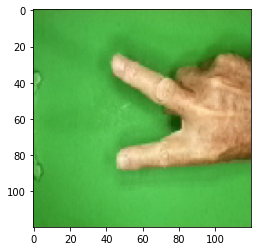

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print("Not Sure")